# Relatorio de analise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('Aluguel/aluguel_residencial.csv',sep = ';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


https://pandas.pydata.org/docs/reference/frame.html

In [4]:
dados['Valor'].mean()

5046.172821405663

In [5]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [6]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [7]:
grupo_bairro  = dados.groupby('Bairro')

In [8]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean()}/{data.Condominio.mean()}')

Barra da Tijuca -> 7069.552938130986/3591.013461040642
Botafogo -> 8791.828178694159/976.2817869415808
Copacabana -> 4126.677004538578/1148.6822995461423
Flamengo -> 4113.526610644258/1102.1498599439776
Ipanema -> 9352.001133786847/2244.4421768707484
Leblon -> 8746.344992050874/2107.1844197138316
Tijuca -> 2043.52/711.69


In [10]:
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


# Estatisticas descritivas

In [11]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [15]:
grupo_bairro['Valor'].aggregate(['min','max', 'sum']).rename(columns = {'min':'Minimo','max': 'Maximo','sum': 'Soma'})

,Minimo,Maximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do aluguel por bairro')

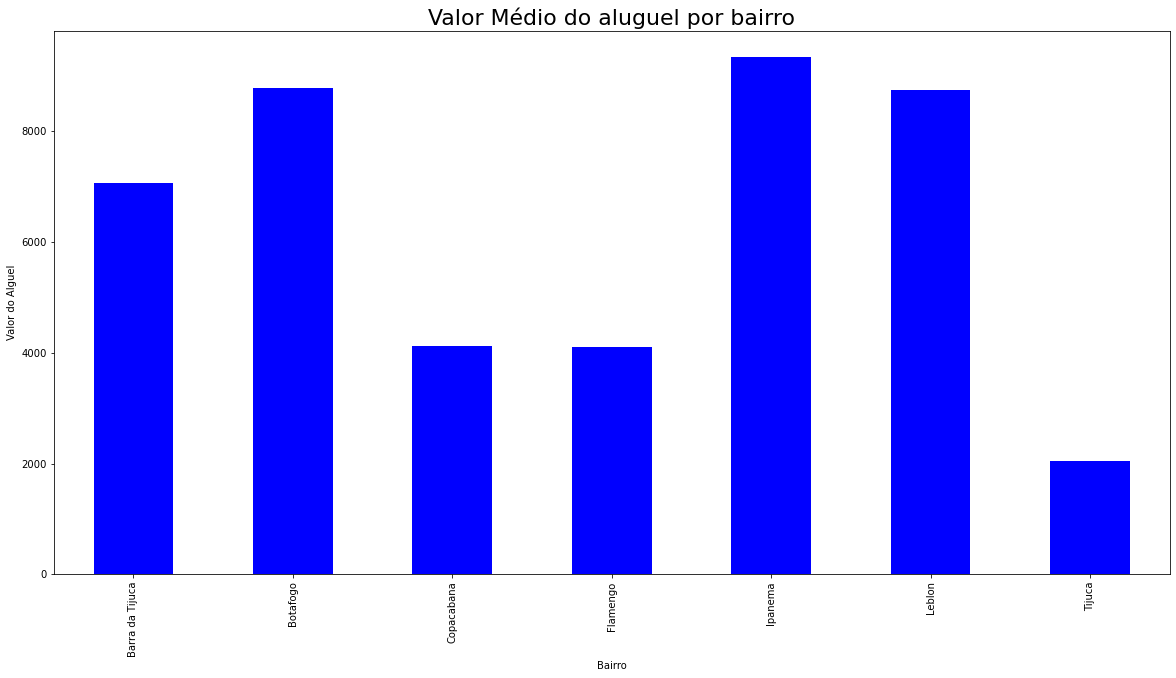

In [20]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = "blue")
fig.set_ylabel('Valor do Alguel')
fig.set_title('Valor Médio do aluguel por bairro', {'fontsize': 22})